In [ ]:
!pip install pandas matplotlib

In [6]:
import pandas as pd
df = pd.read_csv('max_speed.csv')

,time,distance,delta_distance,delta_time,velocity
0,1.706798e+09,3.819,-0.235,0.200773,-1.170478
1,1.706798e+09,3.701,-0.118,0.198604,-0.594146
2,1.706798e+09,3.557,-0.144,0.198648,-0.724901
3,1.706798e+09,3.384,-0.173,0.198505,-0.871515
4,1.706798e+09,3.216,-0.168,0.198671,-0.845621
...,...,...,...,...,...
211,1.706798e+09,3.452,0.156,0.198928,0.784202
212,1.706798e+09,3.620,0.168,0.198707,0.845467
213,1.706798e+09,3.820,0.200,0.198921,1.005425
214,1.706798e+09,4.013,0.193,0.198925,0.970213


In [18]:
import pandas as pd

# Convert the time column from Unix epoch to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# Calculate the relative seconds since start
df['relative_seconds'] = (df['time'] - df['time'].min()).dt.total_seconds()

# Display the updated dataframe
df


,time,distance,delta_distance,delta_time,velocity,acceleration,relative_seconds
0,2024-02-01 14:37:48.491903232,3.819,-0.235,0.200773,-1.170478,NaN,0.000000
1,2024-02-01 14:37:48.692545280,3.701,-0.118,0.198604,-0.594146,0.576332,0.200642
2,2024-02-01 14:37:48.893227520,3.557,-0.144,0.198648,-0.724901,-0.130754,0.401324
3,2024-02-01 14:37:49.093640192,3.384,-0.173,0.198505,-0.871515,-0.146615,0.601737
4,2024-02-01 14:37:49.294152960,3.216,-0.168,0.198671,-0.845621,0.025895,0.802250
...,...,...,...,...,...,...,...
211,2024-02-01 14:38:44.473665792,3.452,0.156,0.198928,0.784202,-0.070534,55.981763
212,2024-02-01 14:38:44.674136064,3.620,0.168,0.198707,0.845467,0.061265,56.182233
213,2024-02-01 14:38:44.874795776,3.820,0.200,0.198921,1.005425,0.159957,56.382893
214,2024-02-01 14:38:45.075441664,4.013,0.193,0.198925,0.970213,-0.035212,56.583538


<Axes: xlabel='relative_seconds'>

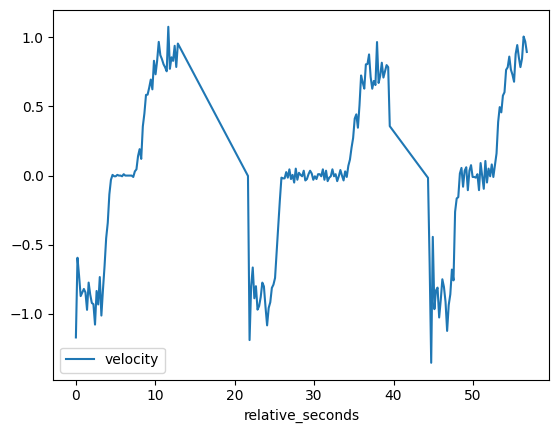

In [19]:
df.plot(x='relative_seconds', y='velocity')

In [20]:
min_velocity = df['velocity'].min()
max_velocity = df['velocity'].max()
avg_velocity = df['velocity'].mean()

min_velocity, max_velocity, avg_velocity


(-1.3536882241501564, 1.0759420685951562, 0.00103077368151272)

<Axes: xlabel='relative_seconds'>

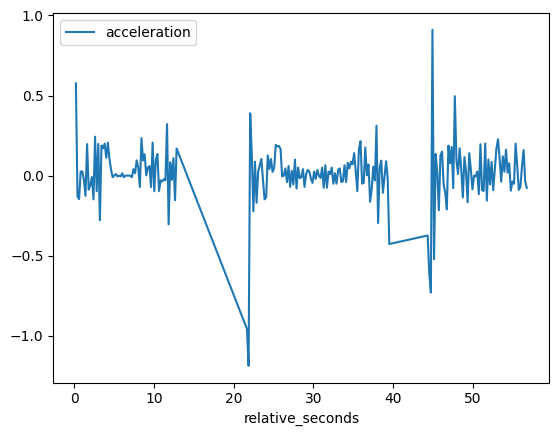

In [24]:
# Calculate the accelerations
df['acceleration'] = df['velocity'].diff()

# Create a new dataframe with only the time and acceleration columns
acceleration_df = df[['relative_seconds', 'acceleration']]

# Plot the acceleration dataframe
acceleration_df.plot(x='relative_seconds', y='acceleration')
